In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [13]:
df = pd.read_json('/home/luismazini/Documents/phd/oxycombustion/ccs_system.json')

In [11]:
target = df['Power surplus in MW'].max() * 0.95

In [10]:
def is_mc(rand: float, target: float) -> int:
    '''
    Function that defines if a value is near or in the Pareto surface

    :param float rand: value
    :param float target: bottom limit of the Pareto surface

    :return: return 1 if the value is in or near the Pareto surface, and 0 if it is not.
    '''
    if rand >= target:
        return 1
    else:
        return 0

In [12]:
mc = np.array(df[['Ideal separation power %', 'Power surplus in MW']])
mc_random = random.choices(mc, k=1000000)

In [13]:
df_list = list(map(lambda p: [p[0], p[1], is_mc(p[1])], mc_random))
df = pd.DataFrame(df_list)

0.8 30.14350195112302


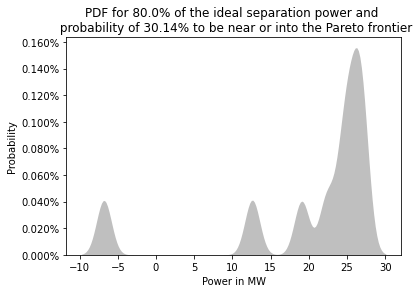

0.4 29.81064897232562


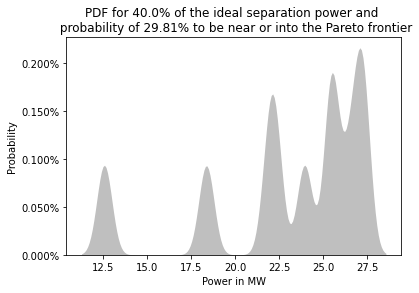

0.9 21.97749485339676


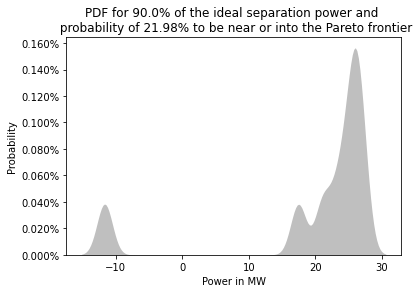

0.2 20.030921904214008


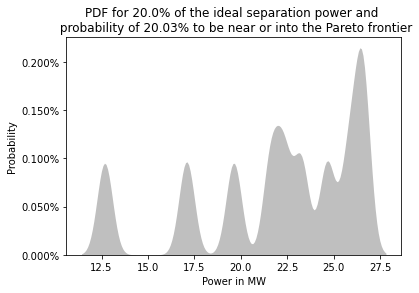

0.5 30.012627401461174


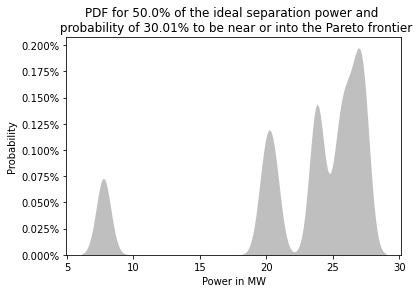

0.6000000000000001 39.85164780757424


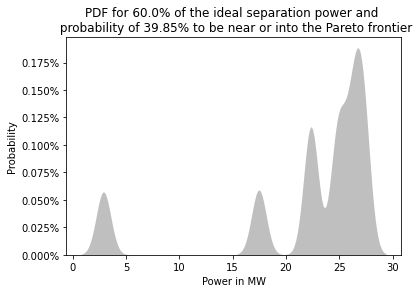

0.7000000000000001 40.17189098020921


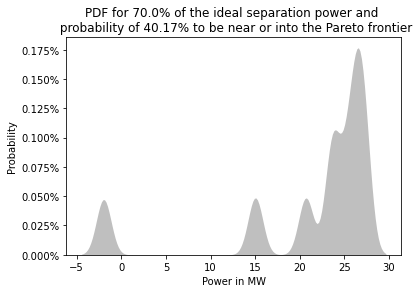

0.1 0.0


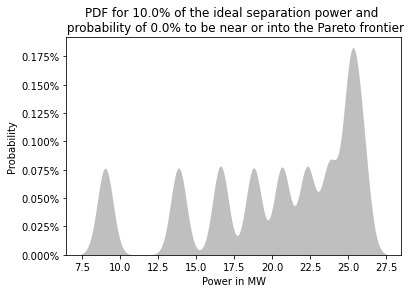

0.30000000000000004 29.99127846860698


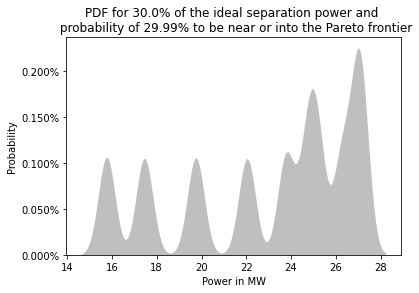

1.0 0.0


LinAlgError: singular matrix

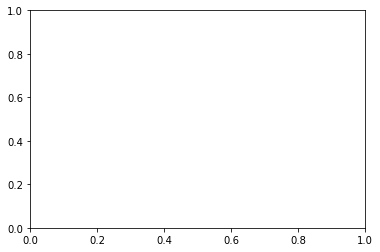

In [15]:
xs = df[0].unique()  # list of the ideal separation powers

for x in xs:  # plot the pdfs of each ideal separation power [0.1 to 0.9]
    sample = df[2][df[0] == x].sum() 
    total = df[2][df[0] == x].count()
    p = sns.kdeplot(data=df[df[0] == x], x=1, fill=True, color='gray', common_norm=False, 
    palette="dark",alpha=.5, linewidth=0)
    p.set_title('PDF for ' + str(round(x*100,2)) + '% of the ideal separation power and \n probability of ' + str(round(sample/total*100,2)) + '% to be near or into the Pareto frontier', fontdict = { 'fontsize': 12})
    p.set(xlabel='Power in MW', ylabel='Probability')
    p.yaxis.set_major_formatter(PercentFormatter())
    plt.show()
